In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -U --force-reinstall scikit-learn
!pip uninstall -y numpy
!pip install numpy==2.1
!pip install -U numba


  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uni

In [3]:
import joblib

# Load mô hình từ file
model = joblib.load("/content/drive/My Drive/Churn Prediction/model.pkl")

In [6]:
!pip install pdpbox --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.8 MB/s eta 0:00:00


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("/content/drive/My Drive/Churn Prediction/dataset/train.csv")
print('df Shape:', df.shape)
# test_df = pd.read_csv("/content/drive/My Drive/Churn Prediction/dataset/test.csv")
# print('test_df Shape:', test_df.shape)

df Shape: (243787, 21)


In [14]:
def datapreparation(filepath):
    df = pd.read_csv(filepath)

    # Tạo một bản sao của DataFrame để tránh SettingWithCopyWarning
    df = df.copy()

    # Loại bỏ cột CustomerID nếu có
    if 'CustomerID' in df.columns:
        df.drop(['CustomerID'], axis=1, inplace=True)

    # Xử lý cột TotalCharges nếu có dữ liệu bị thiếu hoặc khoảng trắng
    if 'TotalCharges' in df.columns:
        df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan).astype(float)
        df['TotalCharges'] = df['TotalCharges'].fillna(0)

    # Chuyển đổi các cột nhị phân từ Yes/No sang 1/0
    binary_cols = ['PaperlessBilling', 'SubtitlesEnabled', 'ParentalControl', 'MultiDeviceAccess']
    for col in binary_cols:
        if col in df.columns:
            df[col] = df[col].map({'Yes': 1, 'No': 0})

    # Chuyển đổi giới tính thành số (Male -> 0, Female -> 1)
    if 'Gender' in df.columns:
        df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

    # Xử lý các giá trị danh mục bằng One-Hot Encoding
    categorical_cols = ['SubscriptionType', 'PaymentMethod', 'ContentType', 'DeviceRegistered', 'GenrePreference']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

    return df


In [15]:
df = datapreparation("/content/drive/My Drive/Churn Prediction/dataset/train.csv")
print('Processed df Shape:', df.shape)

# Xử lý dữ liệu testing
# test_df = datapreparation("/content/drive/My Drive/Churn Prediction/dataset/test.csv")
# print('Processed test_df Shape:', test_df.shape)

Processed df Shape: (243787, 34)


In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=111, stratify = df.Churn)

In [18]:
x = df.columns[df.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


# In kích thước dữ liệu sau khi tách
print("Train X Shape:", train_x.shape)
print("Train Y Shape:", train_y.shape)
print("Test X Shape:", test_x.shape)
print("Test Y Shape:", test_y.shape)


Train X Shape: (195029, 33)
Train Y Shape: (195029,)
Test X Shape: (48758, 33)
Test Y Shape: (48758,)


Scikit-Learn Version: 1.6.1
SHAP Version: 0.46.0
Test Set Columns: Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'PaperlessBilling',
       'MultiDeviceAccess', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth',
       'Gender', 'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled',
       'SubscriptionType_Basic', 'SubscriptionType_Premium',
       'SubscriptionType_Standard', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'ContentType_Both', 'ContentType_Movies',
       'ContentType_TV Shows', 'DeviceRegistered_Computer',
       'DeviceRegistered_Mobile', 'DeviceRegistered_TV',
       'DeviceRegistered_Tablet', 'GenrePreference_Action',
       'GenrePreference_Comedy', 'GenrePreference_Drama',
       'GenrePreference_Fantasy', 'GenrePreference_Sci-Fi'],
      dtype='object')

Feature Importance từ Permutation Imp

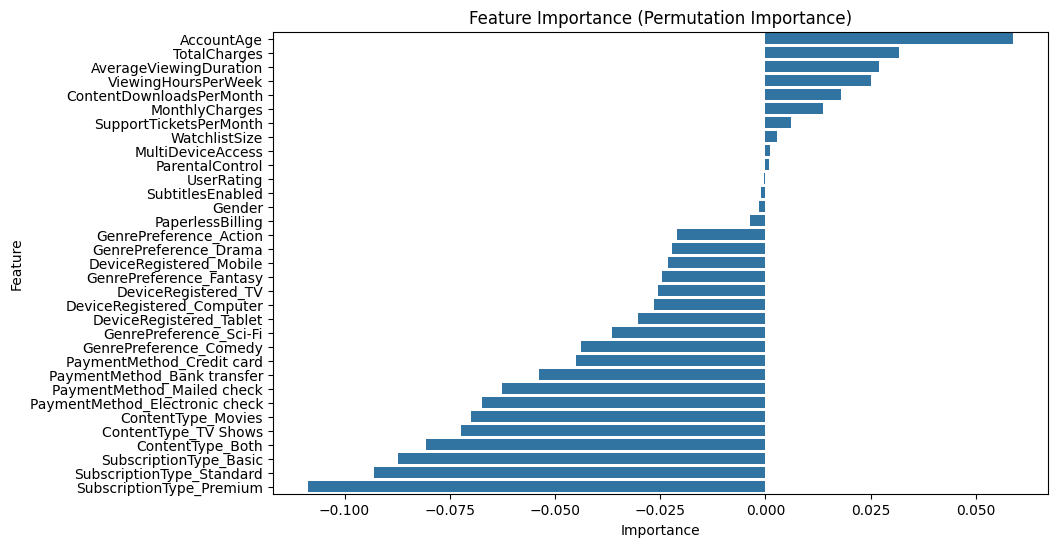

In [20]:
from sklearn.inspection import permutation_importance

# Import PDPBox để vẽ Partial Dependence Plot
from pdpbox import pdp, info_plots

# Import SHAP để phân tích ảnh hưởng của feature
import shap

# Kiểm tra phiên bản của các thư viện
import sklearn
print("Scikit-Learn Version:", sklearn.__version__)
print("SHAP Version:", shap.__version__)


# Kiểm tra tập test
print("Test Set Columns:", test_x.columns)

# 🔹 1️⃣ Permutation Importance - Thay thế `eli5`
perm_importance = permutation_importance(model, test_x, test_y, scoring="f1", random_state=42)

# Tạo DataFrame chứa feature importance
feature_importance_df = pd.DataFrame({
    "Feature": test_x.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Hiển thị bảng kết quả
print("\nFeature Importance từ Permutation Importance:")
print(feature_importance_df)

# Vẽ biểu đồ Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance (Permutation Importance)")
plt.show()

In [27]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n):
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang):
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], Probability=1, fname=False):

    N = len(labels)
    colors = colors[::-1]

    """
    begins the plotting
    """

    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(4)

    labels = labels[::-1]

    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors):
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))

    [ax.add_patch(p) for p in patches]


    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels):

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)

    ax.text(0, -0.05, 'Churn Probability ' + np.round(Probability,2).astype(str), horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """

    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')

    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """

    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)


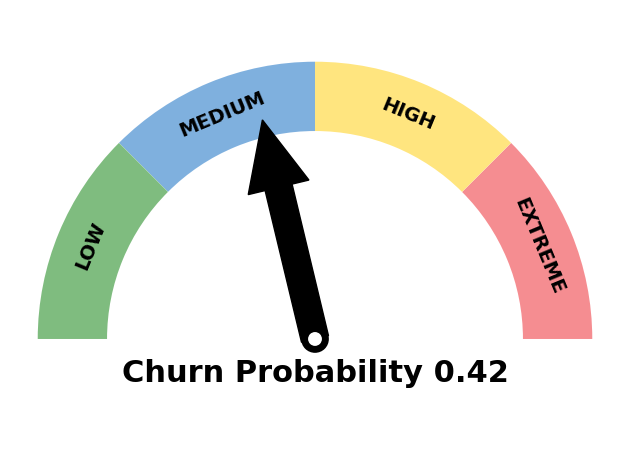

In [28]:
# Kiểm tra khách hàng đầu tiên trong tập test
gauge(Probability=model.predict_proba(test_x.iloc[0:1])[0,1])

In [29]:
# Kiểm tra nếu test_y có nhãn
if test_y is not None:
    print("🔹 Giá trị Churn thực tế của khách hàng đầu tiên:", test_y.iloc[0])
else:
    print("⚠ Tập test không có nhãn Churn, không thể kiểm tra giá trị thực tế.")


🔹 Giá trị Churn thực tế của khách hàng đầu tiên: 1
